# 4.9 IC Visualization, Part 2

Note that this script includes visualizations that include the customer database, which was just added to the project

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Visualizations <br>

 > 04.01 Line Chart: age and number_dependents <br>
 > 04.02 Scatterplot: age and income <br>
 > 04.03 Scatterplot: age and family status <br>

 

## 01 Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_all.pkl')) 

## 03 Data Checks

In [4]:
# Check top
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spend_flag,frequent_orders,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32404859, 30)

## 04 Visualizations

### 04.01 Line Chart: age and number_dependents

In [7]:
# Create redacted dataset with age and number_dependents.
df_age_numberdependents = df[['age', 'number_dependents']]

In [8]:
# Data check
df_age_numberdependents.head()

,age,number_dependents
0,31,3
1,31,3
2,31,3
3,31,3
4,31,3


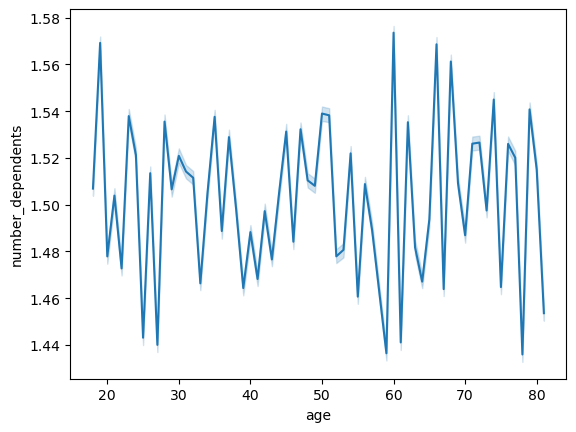

In [10]:
# Line chart
line_age_numberdependents = sns.lineplot(data = df_age_numberdependents, x = 'age', y = 'number_dependents')

Any relationship between age and number of dependents is not apparent using this line chart.

In [11]:
# Export
line_age_numberdependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_numberdependents.png'))

### 04.02 Scatterplot: age and income

In [13]:
# Create redacted dataset with age and income.
df_age_income = df[['age','income']]

In [14]:
# Consistency check
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


In [15]:
# Data check
df_age_income.shape

(32404859, 2)

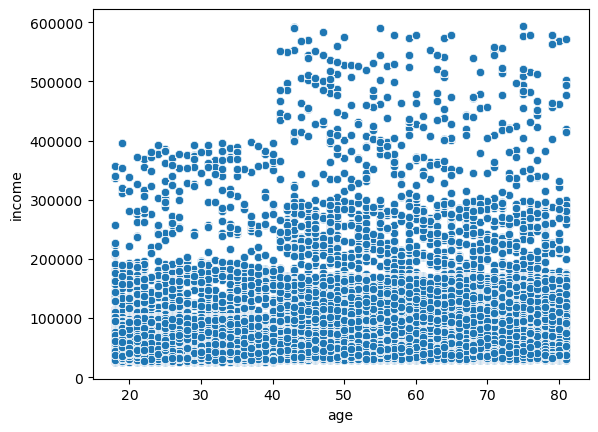

In [16]:
# Scatterplot
scatterplot = sns.scatterplot(data = df_age_income, x = 'age', y = 'income')

Any relationship between age and income is difficult to see in this scatterplot. It is apparent that people under age 40 tend to have lower incomes, and very few, if any make more than 400,000. After age 40, people tend to still have a high variance in come in that the lower income brackets are still full, nonetheless, some of the customers do make more than 400,000.

In [17]:
# Export
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

### 04.03 Scatterplot: age and family status

In [6]:
# Create redacted dataset with age and family status.
df_age_familystat = df[['age','family_status']]

In [7]:
# Consistency check
df_age_familystat.head()

,age,family_status
0,31,married
1,31,married
2,31,married
3,31,married
4,31,married


In [9]:
# Create a crosstab
crosstab_age_familystat = pd.crosstab(df_age_familystat['age'], df_age_familystat['family_status'], dropna=False)

In [10]:
# Check
crosstab_age_familystat

family_status,divorced/widowed,living with parents and siblings,married,single
age,,,,
18,0,375158,0,125316
19,0,408822,0,110784
20,0,377039,0,125809
21,0,389584,0,122943
22,0,0,379672,134181
...,...,...,...,...
77,119783,0,382337,0
78,128848,0,366463,0
79,124377,0,405365,0


In [11]:
# to clipboard
crosstab_age_familystat.to_clipboard()